In [1]:
import pandas as pd
import geopandas as gpd 

import seaborn as sns 
import folium 

from matplotlib import pyplot as plt

In [2]:
sheet = pd.read_html('https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#')

tests_state = sheet[1]

tests_state.columns = tests_state.iloc[0]

tests_state = tests_state.drop([0, 1])

tests_state = tests_state.drop(1.0, axis=1)

In [3]:
tests_state.head()

,State,Positive,Negative,Pending,Death,Total,Last update (ET),Check time (ET)
2,AK,12,686,NaN,NaN,698,3/20 16:30,3/20 16:14
3,AL,81,28,NaN,0,109,3/20 11:00,3/20 14:46
4,AR,96,351,203,NaN,650,3/20 14:19,3/20 14:48
5,AS,0,NaN,NaN,0,0,3/19 00:00,3/20 14:50
6,AZ,65,211,101,0,377,3/20 00:00,3/20 14:52


In [4]:
state_names = pd.read_html('https://developers.google.com/public-data/docs/canonical/states_csv')[0]

In [5]:
states = gpd.read_file('gz_2010_us_040_00_500k.json')

In [6]:
states = states.merge(state_names, right_on='name', left_on='NAME')

In [7]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",ME,45.253783,-69.445469,Maine
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",MA,42.407211,-71.382437,Massachusetts
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",MI,44.314844,-85.602364,Michigan
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",MT,46.879682,-110.362566,Montana
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",NV,38.802610,-116.419389,Nevada


In [8]:
tests = states.merge(tests_state, left_on='state', right_on='State')

tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Death,Total,Last update (ET),Check time (ET)
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",ME,45.253783,-69.445469,Maine,ME,57,2264,NaN,NaN,2321,3/20 11:00,3/20 15:41
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",MA,42.407211,-71.382437,Massachusetts,MA,413,3678,NaN,1,4091,3/20 16:00,3/20 16:19
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",MI,44.314844,-85.602364,Michigan,MI,549,2069,NaN,3,2618,3/20 15:00,3/20 15:55
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",MT,46.879682,-110.362566,Montana,MT,16,931,NaN,NaN,947,3/19 22:11,3/20 15:51
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",NV,38.802610,-116.419389,Nevada,NV,109,1992,-3,1,2098,3/20 02:59,3/20 15:40


In [9]:
tests[['Positive', 'Negative', 'Total']] = tests[['Positive', 'Negative', 'Total']].apply(pd.to_numeric, axis=1)

In [10]:
tests['positive_ratio'] = tests['Positive'] / tests['Total']

In [11]:
tests = tests.to_crs(epsg=2163)

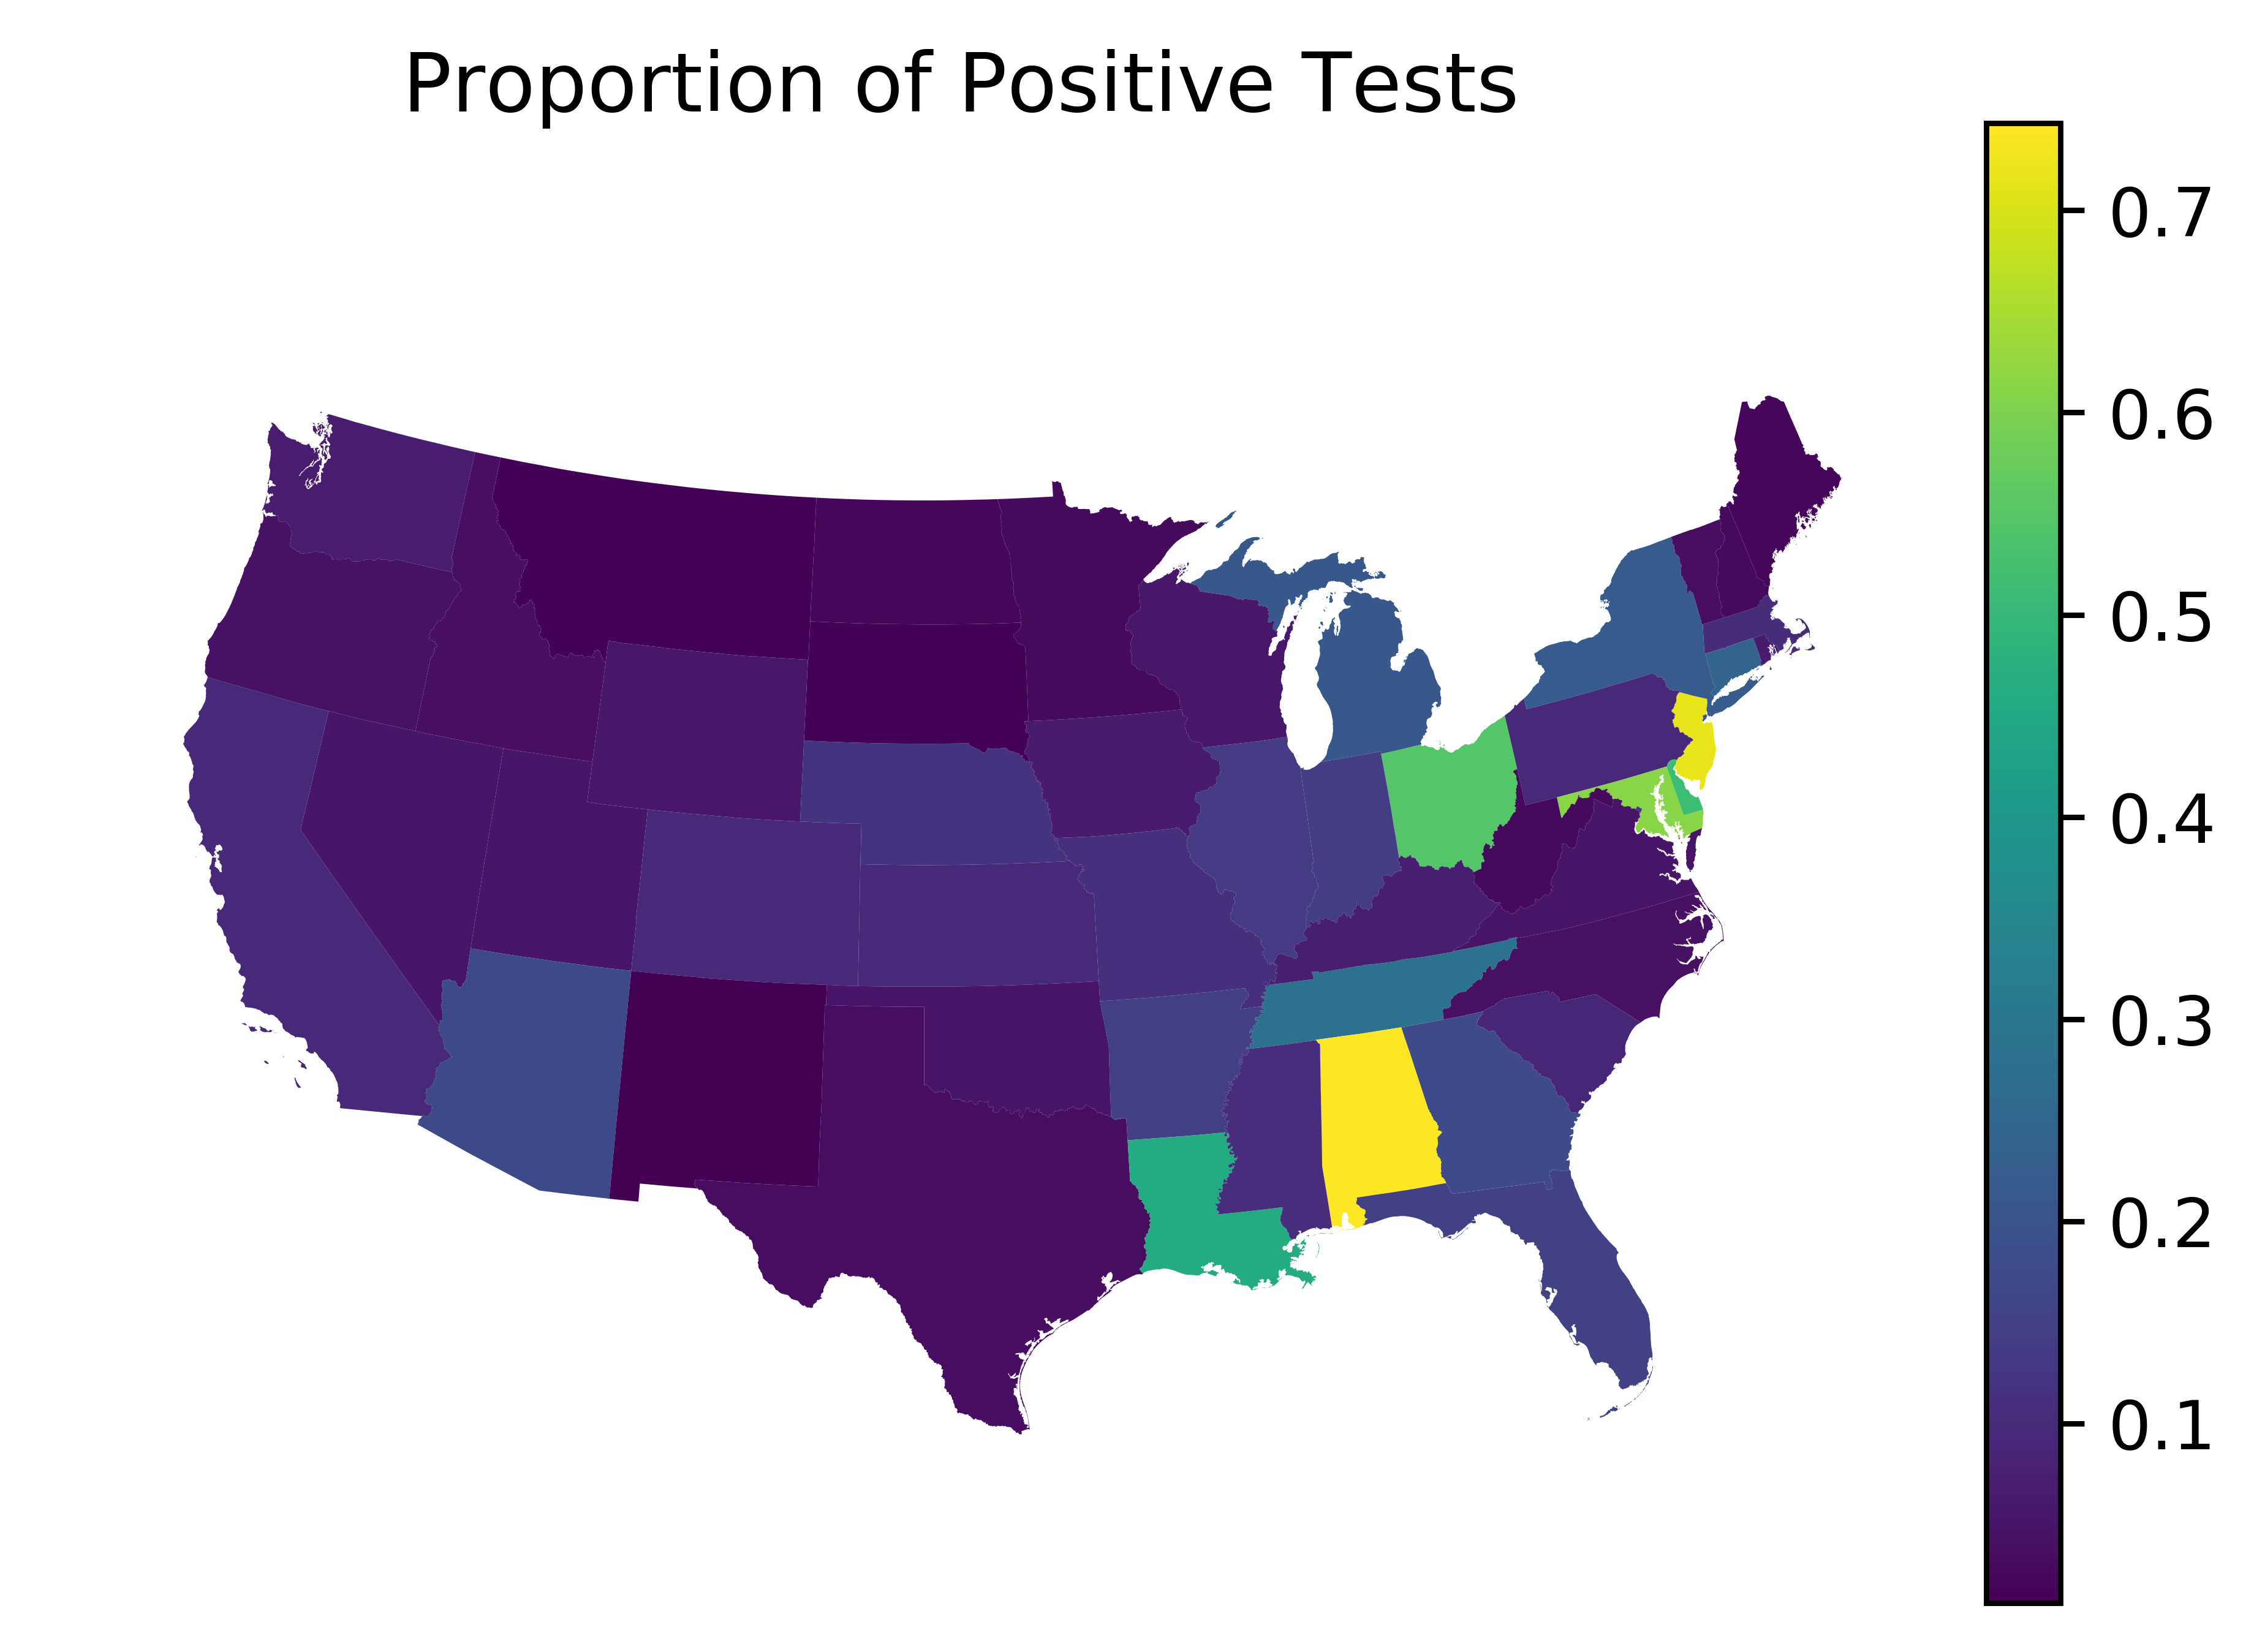

In [12]:
fig, ax = plt.subplots(dpi=800)

ax.axis('off')

ax.set_xlim(-2400000, 2600000)
ax.set_ylim(-2500000, 1400000)

ax.set_title('Proportion of Positive Tests')

tests.plot(column='positive_ratio', ax=ax, legend=True)

plt.savefig('us_positive_tests.png')

In [13]:
tests

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Death,Total,Last update (ET),Check time (ET),positive_ratio
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((2481859.580 455049.846, 248207...",ME,45.253783,-69.445469,Maine,ME,57,2264,NaN,NaN,2321,3/20 11:00,3/20 15:41,0.024558
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((2362703.001 50904.245, 2363640...",MA,42.407211,-71.382437,Massachusetts,MA,413,3678,NaN,1,4091,3/20 16:00,3/20 16:19,0.100953
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((836812.799 405835.513, 837383....",MI,44.314844,-85.602364,Michigan,MI,549,2069,NaN,3,2618,3/20 15:00,3/20 15:55,0.209702
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-318890.806 7702.207, -333993.484 85...",MT,46.879682,-110.362566,Montana,MT,16,931,NaN,NaN,947,3/19 22:11,3/20 15:51,0.016895
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-1243582.730 -784225.062, -1244262.3...",NV,38.802610,-116.419389,Nevada,NV,109,1992,-3,1,2098,3/20 02:59,3/20 15:40,0.051954
5,0400000US34,34,New Jersey,,7354.220,"POLYGON ((2059580.687 -285612.212, 2059599.494...",NJ,40.058324,-74.405661,New Jersey,NJ,890,264,86,11,1240,3/20 13:30,3/20 14:35,0.717742
6,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((2288887.497 -15055.608, 229006...",NY,43.299428,-74.217933,New York,NY,7102,25325,NaN,35,32427,3/20 13:20,3/20 15:44,0.219015
7,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((1555290.640 -833665.056, 15555...",NC,35.759573,-79.019300,North Carolina,NC,137,3096,NaN,0,3233,3/20 09:35,3/20 15:51,0.042376
8,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((1413986.357 -215359.903, 14142...",OH,40.417287,-82.907123,Ohio,OH,169,140,NaN,1,309,3/20 14:00,3/20 15:23,0.546926
9,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((2064082.876 -267052.237, 2062800.436...",PA,41.203322,-77.194525,Pennsylvania,PA,268,2574,NaN,1,2842,3/20 12:00,3/20 15:56,0.094300


In [14]:
# change column names to have nicer display in map
tests = tests.drop('State', axis=1).rename({'NAME': 'State'}, axis=1)

In [19]:
m = folium.Map(tiles='CartoDB positron',
               zoom_start=4,
               location=(39.8283, -98.5795))

In [20]:
cp = folium.Choropleth(tests,
                  data=tests, 
                  key_on='feature.properties.GEO_ID',
                  fill_color='YlOrRd', 
                  columns=['GEO_ID', 'positive_ratio'],
                  legend_name='Proportion of Positive Test Results (from total number of tests in each state)').add_to(m)

cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['State', 'Positive', 'Negative', 'Total'])
);

In [21]:
m.save('map.html')

In [18]:
?folium.Choropleth

Init signature:
folium.Choropleth(
    geo_data,
    data=None,
    columns=None,
    key_on=None,
    bins=6,
    fill_color='blue',
    nan_fill_color='black',
    fill_opacity=0.6,
    nan_fill_opacity=None,
    line_color='black',
    line_weight=1,
    line_opacity=1,
    name=None,
    legend_name='',
    overlay=True,
    control=True,
    show=True,
    topojson=None,
    smooth_factor=None,
    highlight=None,
    **kwargs,
)
Docstring:     
Apply a GeoJSON overlay to the map.

Plot a GeoJSON overlay on the base map. There is no requirement
to bind data (passing just a GeoJSON plots a single-color overlay),
but there is a data binding option to map your columnar data to
different feature objects with a color scale.

If data is passed as a Pandas DataFrame, the "columns" and "key-on"
keywords must be included, the first to indicate which DataFrame
columns to use, the second to indicate the layer in the GeoJSON
on which to key the data. The 'columns' keyword does not need to be
